In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import json

In [3]:
from matplotlib import pyplot as plt

def savefig(*args, **kwargs):
    plt.gcf().patch.set_alpha(0)
    return plt.savefig(*args, **kwargs)

In [4]:
# Control how ladders are drawn
points = ['A', 'B', 'C', 'D', 'A', 'E', 'F', 'B', 'F', 'G', 'C', 'G', 'H', 'D', 'H', 'E']

In [5]:
with open('output/velo_geometry_local.json', 'rt') as f:
    velo_geometry_local = json.load(f)

with open('output/velo_geometry_global.json', 'rt') as f:
    velo_geometry_global = json.load(f)

## Measure the size of the ladders

In [6]:
x_size, y_size, z_size = {}, {}, {}
for key, ladder in velo_geometry_local.items():
    x_size[key] = round(ladder['G'][0]-ladder['H'][0], 7)
    y_size[key] = round(ladder['G'][1]-ladder['F'][1], 7)
    z_size[key] = round(ladder['E'][2]-ladder['A'][2], 7)

# All ladders should be the same size
x_size = set(x_size.values())
y_size = set(y_size.values())
z_size = set(z_size.values())
assert len(x_size) == 1 and len(y_size) == 1 and len(z_size) == 1

print('Velo ladder size is:', end=' ')
print(x_size.pop(), y_size.pop(), z_size.pop(), sep='mm ', end='mm\n')

Velo ladder size is: 42.57mm 15.08mm 0.2mm


## Look at the $xy$ plane for all modules

To check that the all line up

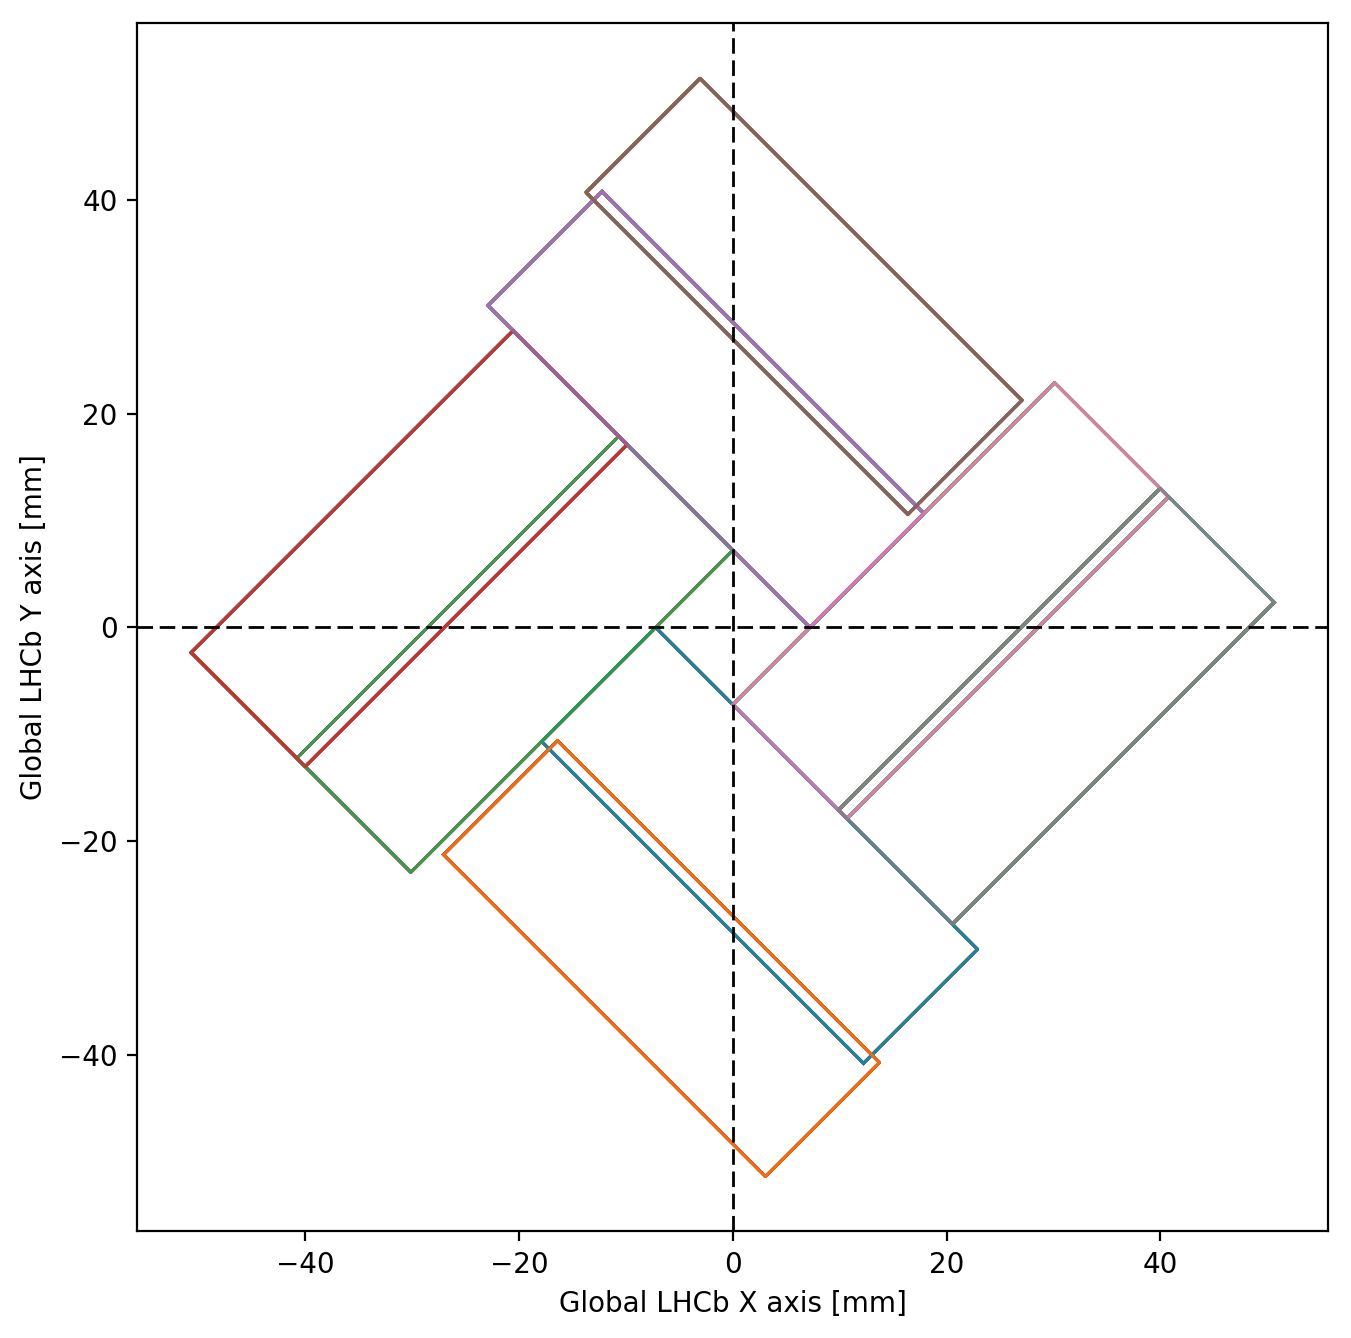

In [7]:
plt.figure(figsize=[8, 8], dpi=100)
for m_id in range(0, 52, 2):
    assert m_id % 2 == 0
    # Draw all ladders for this module
    for vp_side in ['VPRight', 'VPLeft']:
        for l_id in range(4):
            ladder = velo_geometry_global[
                f'/dd/Structure/LHCb/BeforeMagnetRegion/VP/{vp_side}/'
                f'Module{m_id:002d}WithSupport/Module{m_id:002d}/Ladder{l_id}'
            ]
            xs = [ladder[p][0] for p in points]
            ys = [ladder[p][1] for p in points]
            plt.plot(xs, ys, label=f'M{m_id:002d} L{l_id}', lw=1, alpha=0.75)
        # Increment the module id
        m_id += 1

plt.gca().set_aspect('equal')
plt.xlabel('Global LHCb X axis [mm]')
plt.ylabel('Global LHCb Y axis [mm]')
plt.axvline(0, ls='--', c='k', lw=1)
plt.axhline(0, ls='--', c='k', lw=1)
savefig('velo_cross_section_stacked.pdf')

## Look at the $xy$ plane for a single pair of modules

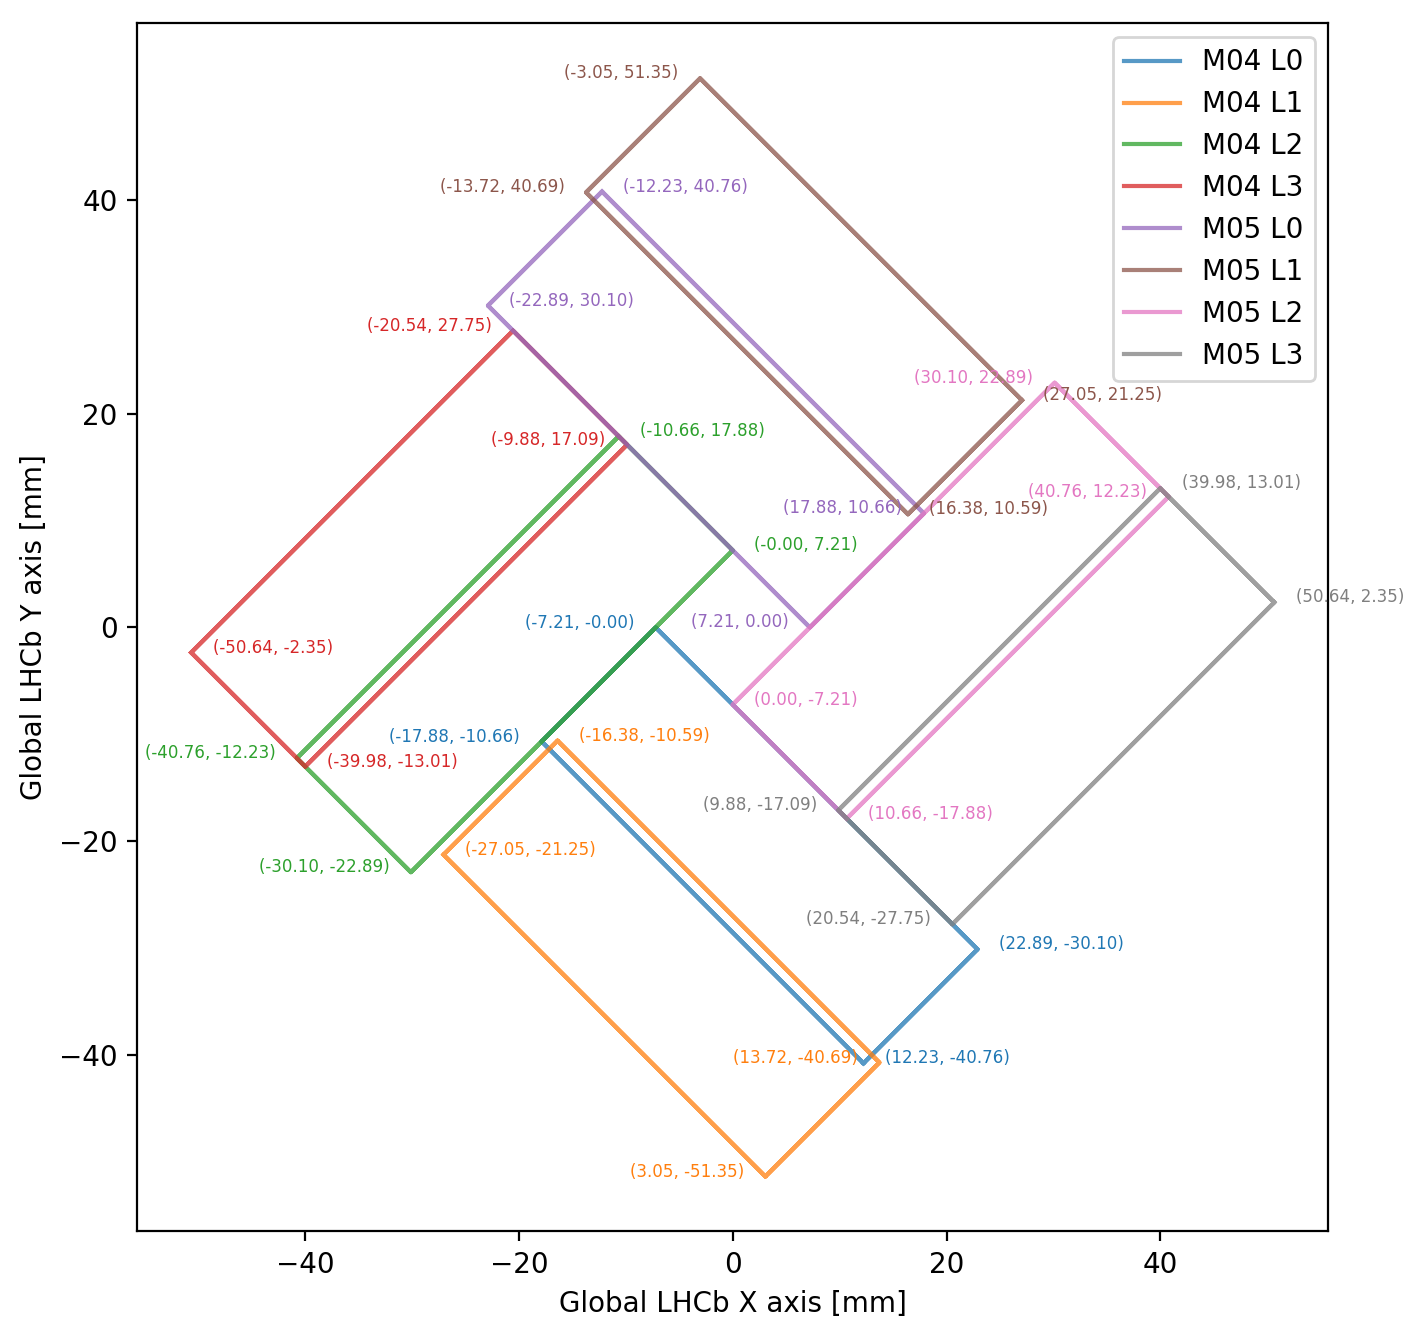

In [8]:
m_id = 4

plt.figure(figsize=[8, 8], dpi=100)
assert m_id % 2 == 0
for vp_side in ['VPRight', 'VPLeft']:
    # Draw all ladders for this module
    for l_id in range(4):
        ladder = velo_geometry_global[
            f'/dd/Structure/LHCb/BeforeMagnetRegion/VP/{vp_side}/'
            f'Module{m_id:002d}WithSupport/Module{m_id:002d}/Ladder{l_id}'
        ]
        xs = [ladder[p][0] for p in points]
        ys = [ladder[p][1] for p in points]
        line, = plt.plot(xs, ys, label=f'M{m_id:002d} L{l_id}', alpha=0.75)
        plt.text(xs[0]+2, ys[0], f'({xs[0]:.2f}, {ys[0]:.2f})', fontsize=6, ha='left', color=line.get_c())
        plt.text(xs[1]-2, ys[1], f'({xs[1]:.2f}, {ys[1]:.2f})', fontsize=6, ha='right', color=line.get_c())
        plt.text(xs[2]-2, ys[2], f'({xs[2]:.2f}, {ys[2]:.2f})', fontsize=6, ha='right', color=line.get_c())
        plt.text(xs[3]+2, ys[3], f'({xs[3]:.2f}, {ys[3]:.2f})', fontsize=6, ha='left', color=line.get_c())
    # Increment the module id
    m_id += 1

plt.gca().set_aspect('equal')
plt.xlabel('Global LHCb X axis [mm]')
plt.ylabel('Global LHCb Y axis [mm]')
plt.legend()
savefig('velo_cross_section_M04_M05.pdf')

## Look at the $xz$ plane

0: -287.5, 1: -275.0, 2: -262.5, 3: -250.0, 4: -237.5, 5: -225.0, 6: -212.5, 7: -200.0, 8: -137.5, 9: -125.0, 10: -62.5, 11: -50.0, 12: -37.5, 13: -25.0, 14: -12.5, 15: 0.0, 16: 12.5, 17: 25.0, 18: 37.5, 19: 50.0, 20: 62.5, 21: 75.0, 22: 87.5, 23: 100.0, 24: 112.5, 25: 125.0, 26: 137.5, 27: 150.0, 28: 162.5, 29: 175.0, 30: 187.5, 31: 200.0, 32: 212.5, 33: 225.0, 34: 237.5, 35: 250.0, 36: 262.5, 37: 275.0, 38: 312.5, 39: 325.0, 40: 387.5, 41: 400.0, 42: 487.5, 43: 500.0, 44: 587.5, 45: 600.0, 46: 637.5, 47: 650.0, 48: 687.5, 49: 700.0, 50: 737.5, 51: 750.0, 

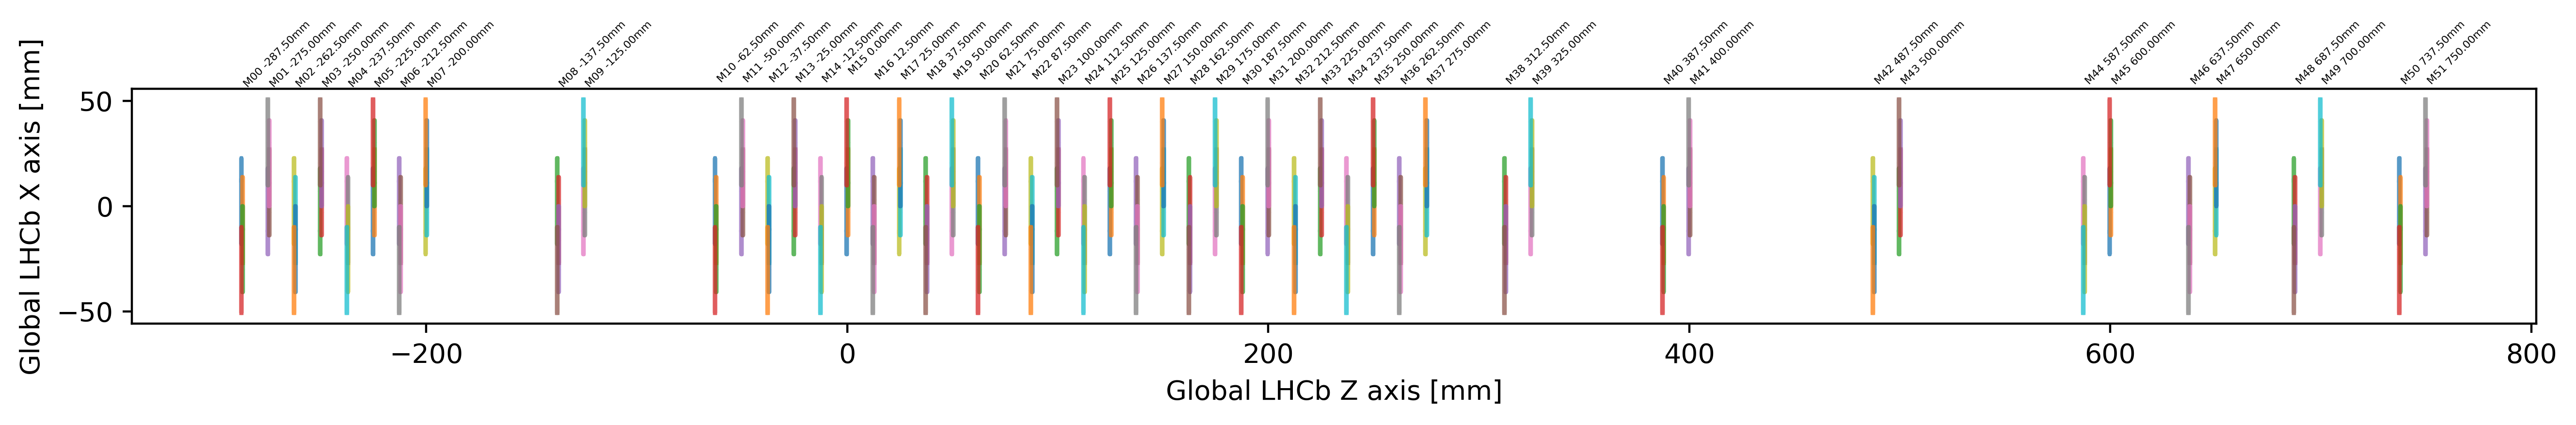

In [9]:
plt.figure(figsize=[16, 8], dpi=200)
for m_id in range(0, 52, 2):
    for vp_side in ['VPRight', 'VPLeft']:
        mean_z_pos = 0
    
        # Draw all ladders for this module
        for l_id in range(4):
            ladder = velo_geometry_global[
                f'/dd/Structure/LHCb/BeforeMagnetRegion/VP/{vp_side}/'
                f'Module{m_id:002d}WithSupport/Module{m_id:002d}/Ladder{l_id}'
            ]
            xs = [ladder[p][2] for p in points]
            ys = [ladder[p][0] for p in points]
            mean_z_pos += sum(xs)/len(xs)/4
            plt.plot(xs, ys, label=f'M{m_id:002d} L{l_id}', alpha=0.75)

        # Draw the position label
        plt.text(mean_z_pos, 85, f'M{m_id:002d} {mean_z_pos:.2f}mm', fontsize=4, rotation=45)
        print(f'{m_id}: {mean_z_pos},', end=' ')

        # Increment the module id
        m_id += 1

plt.gca().set_aspect('equal')
plt.xlabel('Global LHCb Z axis [mm]')
plt.ylabel('Global LHCb X axis [mm]')

## Look at the $yz$ plane

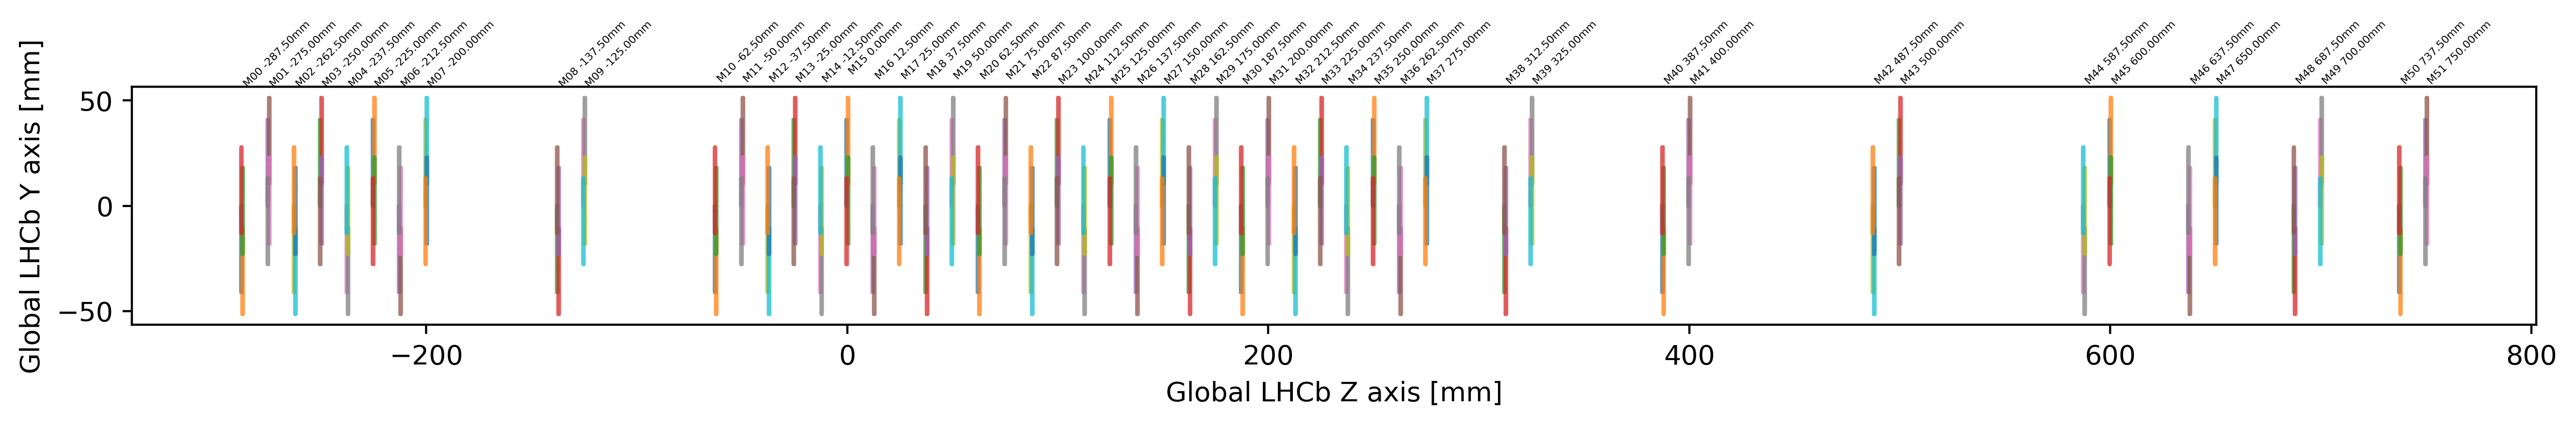

In [10]:
plt.figure(figsize=[16, 8], dpi=200)
for m_id in range(0, 52, 2):
    for vp_side in ['VPRight', 'VPLeft']:
        mean_z_pos = 0
    
        # Draw all ladders for this module
        for l_id in range(4):
            ladder = velo_geometry_global[
                f'/dd/Structure/LHCb/BeforeMagnetRegion/VP/{vp_side}/'
                f'Module{m_id:002d}WithSupport/Module{m_id:002d}/Ladder{l_id}'
            ]
            xs = [ladder[p][2] for p in points]
            ys = [ladder[p][1] for p in points]
            mean_z_pos += sum(xs)/len(xs)/4
            plt.plot(xs, ys, label=f'M{m_id:002d} L{l_id}', alpha=0.75)

        # Draw the position label
        plt.text(mean_z_pos, 85, f'M{m_id:002d} {mean_z_pos:.2f}mm', fontsize=4, rotation=45)

        # Increment the module id
        m_id += 1

plt.gca().set_aspect('equal')
plt.xlabel('Global LHCb Z axis [mm]')
plt.ylabel('Global LHCb Y axis [mm]')

## Look at the $xz$ plane of a single module pair

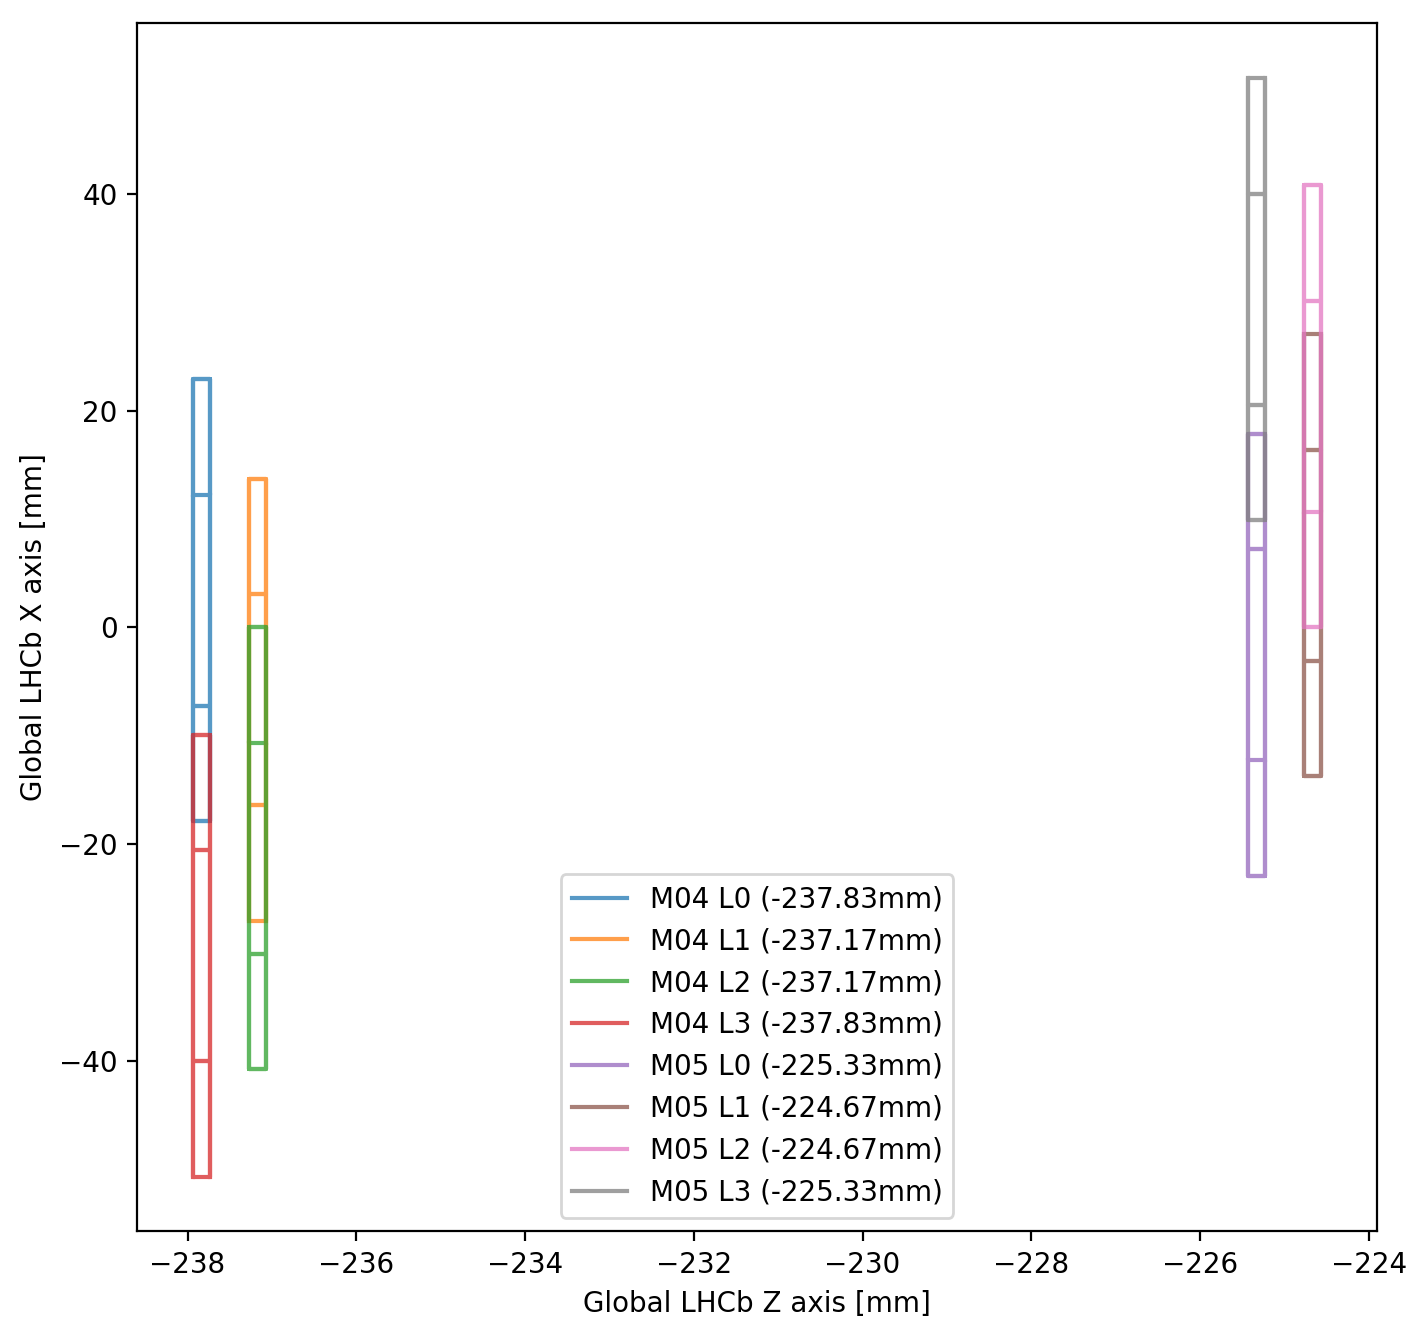

In [11]:
m_id = 4

plt.figure(figsize=[8, 8], dpi=100)
assert m_id % 2 == 0
for vp_side in ['VPRight', 'VPLeft']:
    # Draw all ladders for this module
    for l_id in range(4):
        ladder = velo_geometry_global[
            f'/dd/Structure/LHCb/BeforeMagnetRegion/VP/{vp_side}/'
            f'Module{m_id:002d}WithSupport/Module{m_id:002d}/Ladder{l_id}'
        ]
        xs = [ladder[p][2] for p in points]
        ys = [ladder[p][0] for p in points]
        mean_z_pos = sum(xs)/len(xs)
        plt.plot(xs, ys, label=f'M{m_id:002d} L{l_id} ({mean_z_pos:.2f}mm)', alpha=0.75)

    # Increment the module id
    m_id += 1

plt.xlabel('Global LHCb Z axis [mm]')
plt.ylabel('Global LHCb X axis [mm]')
plt.legend()

## Look at the $yz$ plane of a single module pair

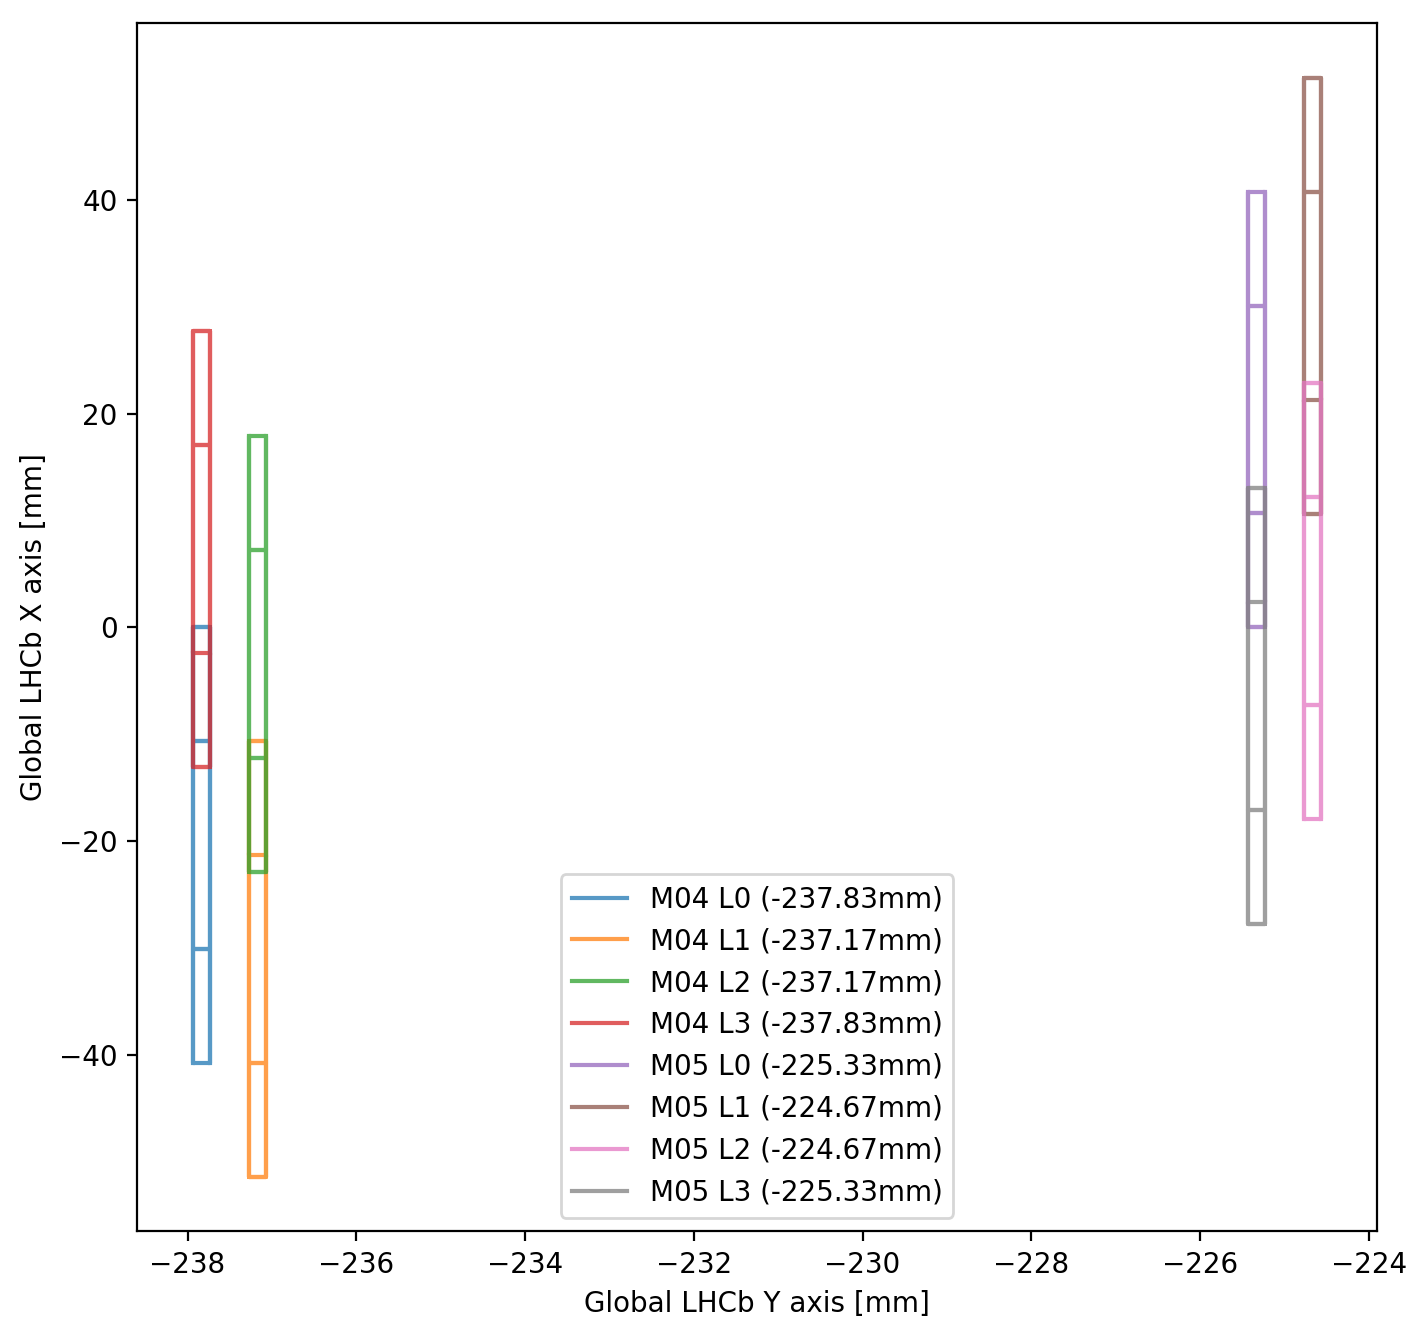

In [12]:
m_id = 4

plt.figure(figsize=[8, 8], dpi=100)
assert m_id % 2 == 0
for vp_side in ['VPRight', 'VPLeft']:
    # Draw all ladders for this module
    for l_id in range(4):
        ladder = velo_geometry_global[
            f'/dd/Structure/LHCb/BeforeMagnetRegion/VP/{vp_side}/'
            f'Module{m_id:002d}WithSupport/Module{m_id:002d}/Ladder{l_id}'
        ]
        xs = [ladder[p][2] for p in points]
        ys = [ladder[p][1] for p in points]
        mean_z_pos = sum(xs)/len(xs)
        plt.plot(xs, ys, label=f'M{m_id:002d} L{l_id} ({mean_z_pos:.2f}mm)', alpha=0.75)

    # Increment the module id
    m_id += 1

plt.xlabel('Global LHCb Y axis [mm]')
plt.ylabel('Global LHCb X axis [mm]')
plt.legend()

## Finally lets print all of the keys in the DDDB

In [13]:
print(*sorted(velo_geometry_global), sep='\n')

/dd/Structure/LHCb/BeforeMagnetRegion/VP/VPLeft/Module01WithSupport/Module01/Ladder0
/dd/Structure/LHCb/BeforeMagnetRegion/VP/VPLeft/Module01WithSupport/Module01/Ladder1
/dd/Structure/LHCb/BeforeMagnetRegion/VP/VPLeft/Module01WithSupport/Module01/Ladder2
/dd/Structure/LHCb/BeforeMagnetRegion/VP/VPLeft/Module01WithSupport/Module01/Ladder3
/dd/Structure/LHCb/BeforeMagnetRegion/VP/VPLeft/Module03WithSupport/Module03/Ladder0
/dd/Structure/LHCb/BeforeMagnetRegion/VP/VPLeft/Module03WithSupport/Module03/Ladder1
/dd/Structure/LHCb/BeforeMagnetRegion/VP/VPLeft/Module03WithSupport/Module03/Ladder2
/dd/Structure/LHCb/BeforeMagnetRegion/VP/VPLeft/Module03WithSupport/Module03/Ladder3
/dd/Structure/LHCb/BeforeMagnetRegion/VP/VPLeft/Module05WithSupport/Module05/Ladder0
/dd/Structure/LHCb/BeforeMagnetRegion/VP/VPLeft/Module05WithSupport/Module05/Ladder1
/dd/Structure/LHCb/BeforeMagnetRegion/VP/VPLeft/Module05WithSupport/Module05/Ladder2
/dd/Structure/LHCb/BeforeMagnetRegion/VP/VPLeft/Module05WithSuppo